# Visualization Concepts for Metabolite Quantile Scoring

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from yellowbrick.cluster import SilhouetteVisualizer, KElbowVisualizer

In [2]:
RESULTS_DIR = '../results/metabolite_quantiles/'
metab_scores = pd.read_csv(f'{RESULTS_DIR}metab_scores.csv')
quantile_assignments = pd.read_csv(f'{RESULTS_DIR}quantile_assignments.csv', index_col='row_id')

In [3]:
metab_scores

,outcome,AUROC,AUPRC,quantile_split,quantile_assignment,metab
0,bpd_any,0.727931,0.709042,C10_quant_3,0.0,C10
1,bpd_any,0.706811,0.696370,C10_quant_3,1.0,C10
2,bpd_any,0.714308,0.742261,C10_quant_3,2.0,C10
3,ivh_any,0.709133,0.661514,C10_quant_3,0.0,C10
4,ivh_any,0.704950,0.675350,C10_quant_3,1.0,C10
...,...,...,...,...,...,...
1443,rop_any,0.681407,0.569342,GLY_quant_5,0.0,GLY
1444,rop_any,0.668349,0.613620,GLY_quant_5,1.0,GLY
1445,rop_any,0.688688,0.632786,GLY_quant_5,2.0,GLY
1446,rop_any,0.712575,0.659027,GLY_quant_5,3.0,GLY


In [4]:
# One way to score which metabolites separate model performance is
# the absolute diff between the top quantile assignment and the bottom
def max_quantile_auroc_diff(df):
    return abs(df['AUROC'].max() - df['AUROC'].min())

metabolite_rankings = (metab_scores
                       .groupby(['outcome', 'quantile_split', 'metab'])
                       .apply(max_quantile_auroc_diff))
metabolite_rankings.name = 'diff_score'
rankings = pd.DataFrame(metabolite_rankings).reset_index().sort_values(['outcome', 'diff_score'], ascending=[True, False])
rankings


,outcome,quantile_split,metab,diff_score
81,bpd_any,RF_Y_quant_5,RF_Y,0.116932
77,bpd_any,RC_A_quant_5,RC_A,0.103699
45,bpd_any,C181_quant_5,C181,0.091082
87,bpd_any,TYR_quant_5,TYR,0.090427
85,bpd_any,RO_C_quant_5,RO_C,0.089777
...,...,...,...,...
304,rop_any,C121_quant_3,C121,0.012617
326,rop_any,C18_quant_3,C18,0.012040
308,rop_any,C141_quant_3,C141,0.010662
324,rop_any,C18OH_quant_3,C18OH,0.007829


In [5]:
assert metab_scores.shape == metab_scores.dropna().shape

In [6]:
# For any given outcome we expect scores corresponding to the number of quantile splits
metab_scores[
    (metab_scores['outcome'] == 'bpd_any') & (metab_scores['quantile_split'] == 'ARG_quant_3')]

,outcome,AUROC,AUPRC,quantile_split,quantile_assignment,metab
192,bpd_any,0.736929,0.744537,ARG_quant_3,0.0,ARG
193,bpd_any,0.706571,0.708143,ARG_quant_3,1.0,ARG
194,bpd_any,0.696558,0.694151,ARG_quant_3,2.0,ARG


In [7]:
rankings[rankings['outcome'] == 'bpd_any']

,outcome,quantile_split,metab,diff_score
81,bpd_any,RF_Y_quant_5,RF_Y,0.116932
77,bpd_any,RC_A_quant_5,RC_A,0.103699
45,bpd_any,C181_quant_5,C181,0.091082
87,bpd_any,TYR_quant_5,TYR,0.090427
85,bpd_any,RO_C_quant_5,RO_C,0.089777
...,...,...,...,...
58,bpd_any,MET_quant_3,MET,0.017118
32,bpd_any,C141_quant_3,C141,0.016299
50,bpd_any,C18_quant_3,C18,0.015358
38,bpd_any,C16OH_quant_3,C16OH,0.013780


In [8]:
quantile_assignments

,C10_quant_3,C05_quant_3,C05DC_quant_3,C18_quant_3,C181_quant_3,CIT_quant_3,C16OH_quant_3,C181OH_quant_3,C14_quant_3,C12_quant_3,...,C141_quant_5,XLE_quant_5,GLY_quant_5,bpd_any,ivh_any,nec_any,rop_any,num_outcomes,health_indicator,health_index
row_id,,,,,,,,,,,,,,,,,,,,,
6,0.0,0.0,1.0,2.0,2.0,1.0,0.0,2.0,0.0,1.0,...,1.0,1.0,0.0,0,0,0,1,1,0,0.524948
11,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,1.0,0.0,...,2.0,0.0,0.0,0,1,0,1,2,0,0.042206
13,2.0,1.0,1.0,0.0,0.0,2.0,2.0,1.0,1.0,2.0,...,2.0,2.0,2.0,0,0,0,1,1,0,0.000000
17,1.0,1.0,2.0,0.0,0.0,2.0,1.0,2.0,0.0,0.0,...,1.0,4.0,4.0,1,1,0,1,3,0,0.074335
19,0.0,1.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,...,4.0,2.0,1.0,0,0,0,0,0,1,0.199474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41396,1.0,2.0,2.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,2.0,3.0,1.0,0,0,0,0,0,1,0.705084
41397,1.0,2.0,0.0,2.0,2.0,2.0,1.0,0.0,0.0,2.0,...,3.0,4.0,3.0,0,0,0,0,0,1,0.873466
41400,2.0,0.0,2.0,0.0,2.0,0.0,0.0,2.0,2.0,1.0,...,2.0,0.0,2.0,1,0,0,0,1,0,0.653314


In [9]:
three_quantile_cols = quantile_assignments.columns[quantile_assignments.columns.str.contains('_quant_3')]
five_quantile_cols = quantile_assignments.columns[quantile_assignments.columns.str.contains('_quant_5')]

In [10]:
len(three_quantile_cols), len(five_quantile_cols)

(46, 46)

In [11]:
three_q_df = quantile_assignments.drop(five_quantile_cols, axis=1)
five_q_df = quantile_assignments.drop(three_quantile_cols, axis=1)

In [12]:
three_q_df

,C10_quant_3,C05_quant_3,C05DC_quant_3,C18_quant_3,C181_quant_3,CIT_quant_3,C16OH_quant_3,C181OH_quant_3,C14_quant_3,C12_quant_3,...,C141_quant_3,XLE_quant_3,GLY_quant_3,bpd_any,ivh_any,nec_any,rop_any,num_outcomes,health_indicator,health_index
row_id,,,,,,,,,,,,,,,,,,,,,
6,0.0,0.0,1.0,2.0,2.0,1.0,0.0,2.0,0.0,1.0,...,0.0,1.0,0.0,0,0,0,1,1,0,0.524948
11,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0,1,0,1,2,0,0.042206
13,2.0,1.0,1.0,0.0,0.0,2.0,2.0,1.0,1.0,2.0,...,1.0,1.0,1.0,0,0,0,1,1,0,0.000000
17,1.0,1.0,2.0,0.0,0.0,2.0,1.0,2.0,0.0,0.0,...,1.0,2.0,2.0,1,1,0,1,3,0,0.074335
19,0.0,1.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,...,2.0,1.0,0.0,0,0,0,0,0,1,0.199474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41396,1.0,2.0,2.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,0,0,0,0,0,1,0.705084
41397,1.0,2.0,0.0,2.0,2.0,2.0,1.0,0.0,0.0,2.0,...,2.0,2.0,2.0,0,0,0,0,0,1,0.873466
41400,2.0,0.0,2.0,0.0,2.0,0.0,0.0,2.0,2.0,1.0,...,1.0,0.0,1.0,1,0,0,0,1,0,0.653314


In [13]:
five_q_df

,C10_quant_5,C05_quant_5,C05DC_quant_5,C18_quant_5,C181_quant_5,CIT_quant_5,C16OH_quant_5,C181OH_quant_5,C14_quant_5,C12_quant_5,...,C141_quant_5,XLE_quant_5,GLY_quant_5,bpd_any,ivh_any,nec_any,rop_any,num_outcomes,health_indicator,health_index
row_id,,,,,,,,,,,,,,,,,,,,,
6,1.0,0.0,3.0,3.0,3.0,2.0,0.0,2.0,0.0,2.0,...,1.0,1.0,0.0,0,0,0,1,1,0,0.524948
11,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,1.0,1.0,...,2.0,0.0,0.0,0,1,0,1,2,0,0.042206
13,4.0,1.0,3.0,0.0,0.0,4.0,4.0,1.0,3.0,3.0,...,2.0,2.0,2.0,0,0,0,1,1,0,0.000000
17,2.0,2.0,3.0,1.0,1.0,3.0,3.0,1.0,0.0,1.0,...,1.0,4.0,4.0,1,1,0,1,3,0,0.074335
19,1.0,1.0,1.0,3.0,4.0,4.0,4.0,2.0,3.0,2.0,...,4.0,2.0,1.0,0,0,0,0,0,1,0.199474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41396,2.0,4.0,4.0,1.0,0.0,1.0,2.0,0.0,1.0,2.0,...,2.0,3.0,1.0,0,0,0,0,0,1,0.705084
41397,2.0,4.0,1.0,4.0,3.0,4.0,3.0,0.0,1.0,3.0,...,3.0,4.0,3.0,0,0,0,0,0,1,0.873466
41400,4.0,0.0,4.0,0.0,3.0,1.0,0.0,2.0,3.0,2.0,...,2.0,0.0,2.0,1,0,0,0,1,0,0.653314


In [14]:
n_clusters = [3, 4, 5, 6, 7, 8, 9, 10]
three_q_results = {c: None for c in n_clusters}
five_q_results = {c: None for c in n_clusters}
for c in n_clusters:
    cluster = KMeans(n_clusters=c)
    three_q_clusters = cluster.fit(three_q_df[three_quantile_cols])
    three_q_df[f'{c}_clusters_label'] = cluster.labels_
    five_q_clusters = cluster.fit(five_q_df[five_quantile_cols])
    five_q_df[f'{c}_clusters_label'] = cluster.labels_

In [15]:
three_q_df.columns

Index(['C10_quant_3', 'C05_quant_3', 'C05DC_quant_3', 'C18_quant_3',
       'C181_quant_3', 'CIT_quant_3', 'C16OH_quant_3', 'C181OH_quant_3',
       'C14_quant_3', 'C12_quant_3', 'PHE_quant_3', 'TYR_quant_3',
       'PRO_quant_3', 'C101_quant_3', 'RO_C_quant_3', 'R8_10_quant_3',
       'ARG_quant_3', 'C18OH_quant_3', 'C081_quant_3', 'RF_Y_quant_3',
       'ALA_quant_3', 'C03DC_quant_3', 'R3_2_quant_3', 'VAL_quant_3',
       'C121_quant_3', 'R14_12_quant_3', 'C02_quant_3', 'C182_quant_3',
       'OXP_quant_3', 'RA_O_quant_3', 'C16_quant_3', 'RF_C_quant_3',
       'FC_quant_3', 'ORN_quant_3', 'C051_quant_3', 'C04_quant_3',
       'RC_A_quant_3', 'C06_quant_3', 'RL_A_quant_3', 'C05OH_quant_3',
       'C08_quant_3', 'MET_quant_3', 'C14OH_quant_3', 'C141_quant_3',
       'XLE_quant_3', 'GLY_quant_3', 'bpd_any', 'ivh_any', 'nec_any',
       'rop_any', 'num_outcomes', 'health_indicator', 'health_index',
       '3_clusters_label', '4_clusters_label', '5_clusters_label',
       '6_clusters_labe

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


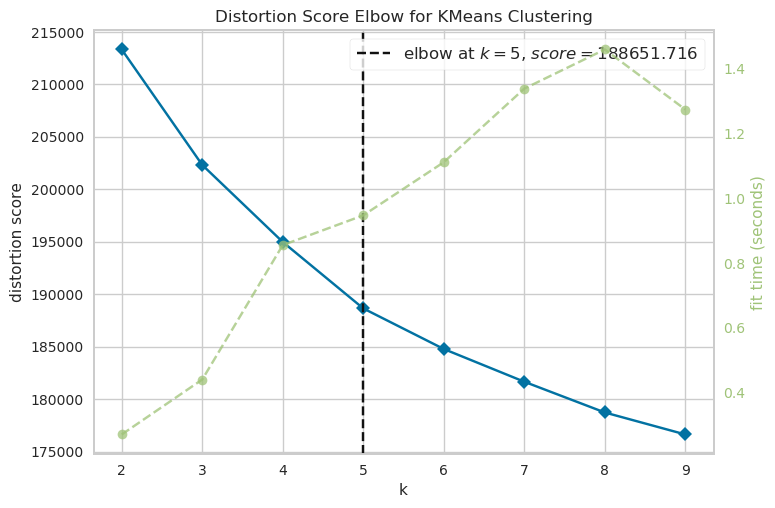

In [16]:
# Silhouette score for justifying clusters, or alternative scores
# With yellowbrick just for quick visualization.
# Starting first with the elbow plot with different metrics
vis = KElbowVisualizer(KMeans(), k=(2, 10))
vis.fit(three_q_df[three_quantile_cols])
vis.show();

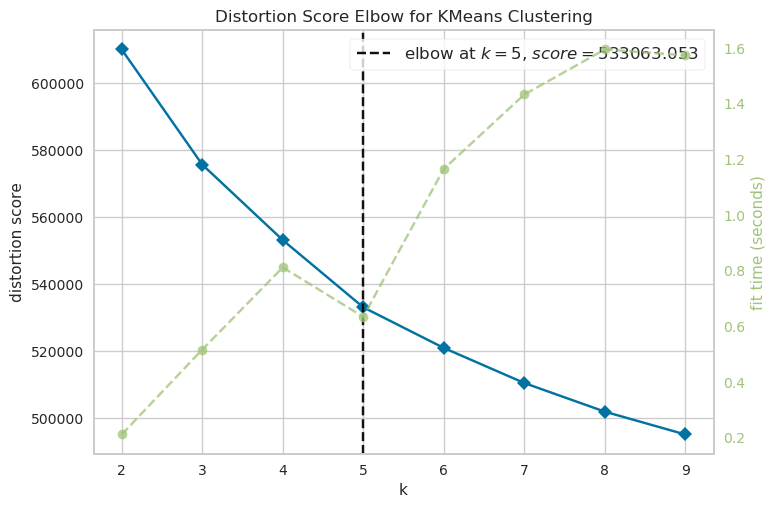

In [17]:
vis = KElbowVisualizer(KMeans(), k=(2, 10))
vis.fit(five_q_df[five_quantile_cols])
vis.show();

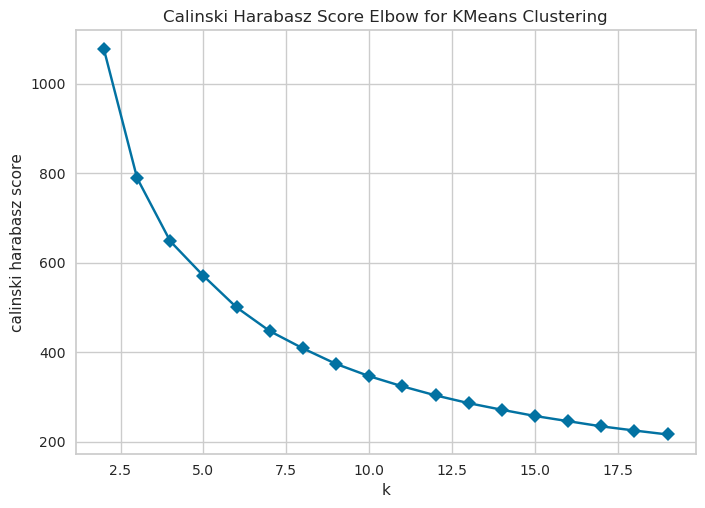

In [18]:
vis = KElbowVisualizer(
    KMeans(), k=(2, 20), metric='calinski_harabasz',
    timings=False, locate_elbow=False)
vis.fit(three_q_df[three_quantile_cols])
vis.show();

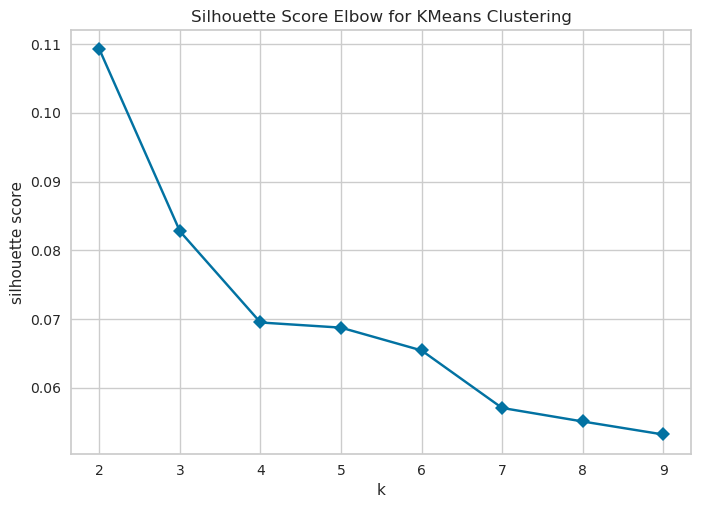

In [19]:
# Then Silhouette score
vis = KElbowVisualizer(
    KMeans(), k=(2, 10), metric='silhouette',
    timings=False, locate_elbow=False)
vis.fit(three_q_df[three_quantile_cols])
vis.show();

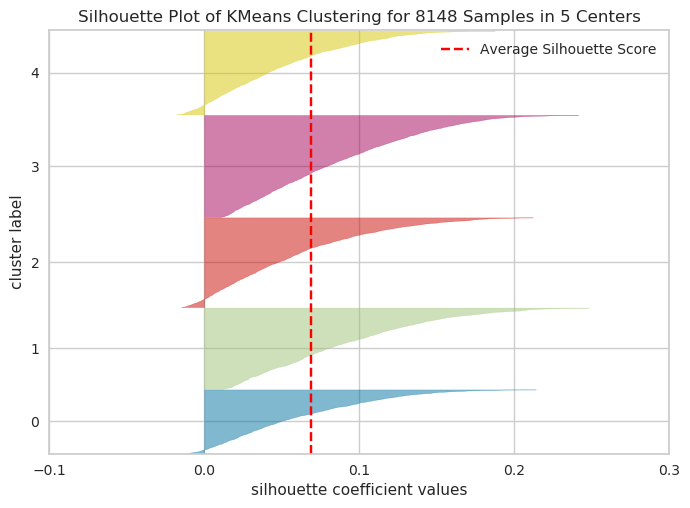

In [20]:
# Then Silhouette score
cluster = KMeans(5, random_state=101)
vis = SilhouetteVisualizer(cluster, colors='yellowbrick')
vis.fit(three_q_df[three_quantile_cols])
vis.show();

Elbow plot suggests that five clusters are the best but silhouette coefficient values are low.
(Might want to precompute distances with a different metric for cluster generation)

In [21]:
# Now t-SNE with the best number of clusters
# Do the clusters correlate with n_outcomes?
# How different are the metabolites with regards to outcomes and clusters?
# Relative to the ability to separate model performance?
tsne = TSNE(
    n_components=2, perplexity=200, init='pca',
    learning_rate='auto', random_state=100)
coords = tsne.fit_transform(three_q_df[three_quantile_cols])
coords

/home/alanleec/mambaforge/envs/newborn-metabolic-health/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


array([[ -5.7596774 ,  -6.731977  ],
       [-11.43574   ,   0.40226698],
       [ -0.5713396 ,  12.933243  ],
       ...,
       [ -0.43416208,  -3.755359  ],
       [  1.0338137 ,  -8.655036  ],
       [-12.263066  ,   8.16082   ]], dtype=float32)

In [22]:
tsne_df = pd.DataFrame(coords, columns=['TSNE1', 'TSNE2'], index=three_q_df.index)
tsne_df = pd.merge(tsne_df, three_q_df.drop(three_quantile_cols, axis=1), left_index=True, right_index=True)
tsne_df

,TSNE1,TSNE2,bpd_any,ivh_any,nec_any,rop_any,num_outcomes,health_indicator,health_index,3_clusters_label,4_clusters_label,5_clusters_label,6_clusters_label,7_clusters_label,8_clusters_label,9_clusters_label,10_clusters_label
row_id,,,,,,,,,,,,,,,,,
6,-5.759677,-6.731977,0,0,0,1,1,0,0.524948,1,1,1,5,3,1,5,5
11,-11.435740,0.402267,0,1,0,1,2,0,0.042206,1,1,1,5,2,6,0,0
13,-0.571340,12.933243,0,0,0,1,1,0,0.000000,1,1,2,1,4,7,6,9
17,7.222109,-9.435332,1,1,0,1,3,0,0.074335,2,3,0,3,4,2,4,8
19,2.221501,9.922201,0,0,0,0,0,1,0.199474,2,3,0,1,0,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41396,8.251695,-10.636547,0,0,0,0,0,1,0.705084,2,3,0,1,4,7,6,8
41397,5.728390,3.327455,0,0,0,0,0,1,0.873466,0,0,3,2,0,3,2,4
41400,-0.434162,-3.755359,1,0,0,0,1,0,0.653314,0,0,4,0,1,5,8,7


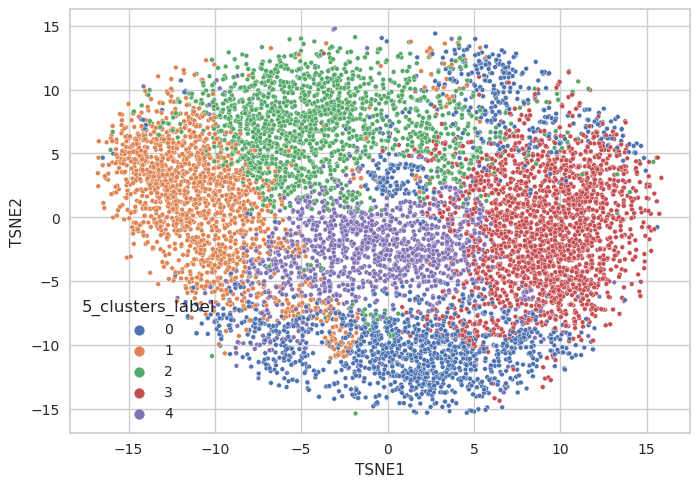

In [23]:
sns.scatterplot(
    x='TSNE1', y='TSNE2', hue='5_clusters_label', data=tsne_df,
    palette='deep', s=12)

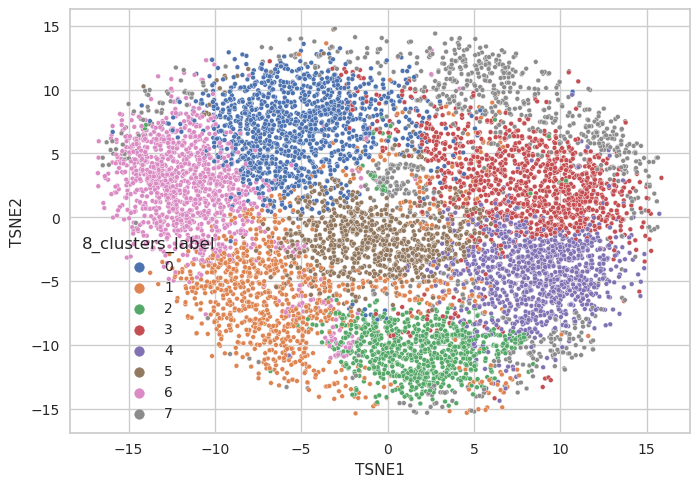

In [24]:
sns.scatterplot(
    x='TSNE1', y='TSNE2', hue='8_clusters_label', data=tsne_df,
    palette='deep', s=12)

In [25]:
# Comparing metabolite rankings in the three quantile regime
three_q_ranks = rankings.loc[rankings.quantile_split.str.contains('quant_3')]
three_q_ranks

,outcome,quantile_split,metab,diff_score
80,bpd_any,RF_Y_quant_3,RF_Y,0.089170
82,bpd_any,RL_A_quant_3,RL_A,0.067948
76,bpd_any,RC_A_quant_3,RC_A,0.067277
78,bpd_any,RF_C_quant_3,RF_C,0.065579
62,bpd_any,OXP_quant_3,OXP,0.059638
...,...,...,...,...
304,rop_any,C121_quant_3,C121,0.012617
326,rop_any,C18_quant_3,C18,0.012040
308,rop_any,C141_quant_3,C141,0.010662
324,rop_any,C18OH_quant_3,C18OH,0.007829


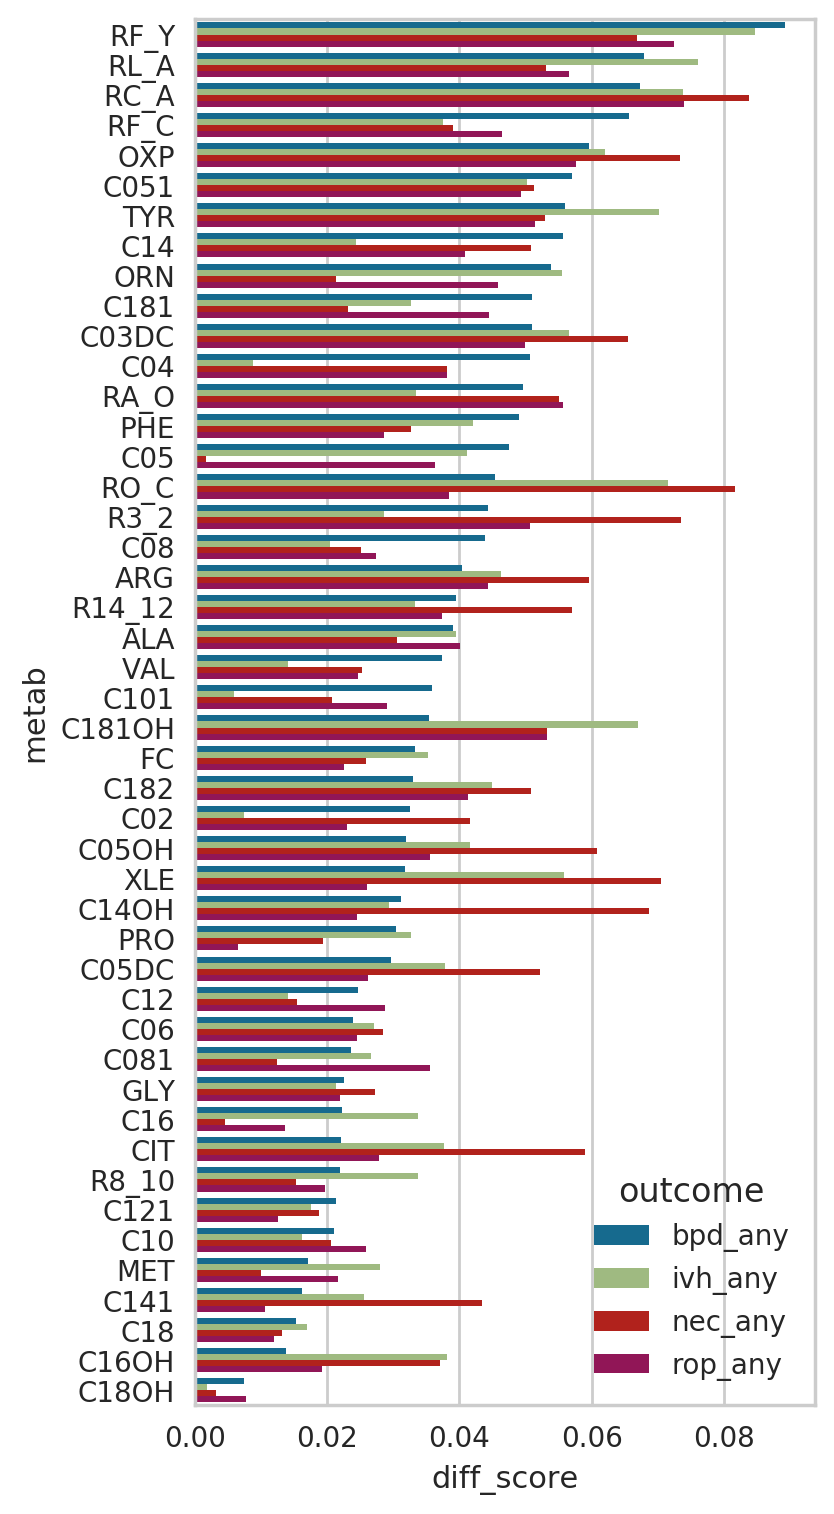

In [26]:
fig, ax = plt.subplots(figsize=(4, 9), dpi=200)
sns.barplot(x='diff_score', y='metab', hue='outcome', 
            data=three_q_ranks, ax=ax)

### Visualizing Metabolites by Correlation

In [27]:
three_q_corr = three_q_df[three_quantile_cols].corr('spearman')
three_q_corr_as_dist = 1 - abs(three_q_corr)

In [28]:
tsne = TSNE(perplexity=13, metric='precomputed', random_state=101)
coords = tsne.fit_transform(three_q_corr_as_dist)

/home/alanleec/mambaforge/envs/newborn-metabolic-health/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/alanleec/mambaforge/envs/newborn-metabolic-health/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/home/alanleec/mambaforge/envs/newborn-metabolic-health/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:827: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  FutureWarning,


In [29]:
three_q_metab_tsne = pd.DataFrame(coords, columns=['TSNE1', 'TSNE2'], index=three_quantile_cols.str.replace('_quant_3', ''))
three_q_metab_tsne = pd.merge(three_q_metab_tsne, three_q_ranks.set_index('metab'), left_index=True, right_index=True)
three_q_metab_tsne

,TSNE1,TSNE2,outcome,quantile_split,diff_score
ALA,131.820282,-9.829820,bpd_any,ALA_quant_3,0.038973
ALA,131.820282,-9.829820,ivh_any,ALA_quant_3,0.039452
ALA,131.820282,-9.829820,nec_any,ALA_quant_3,0.030515
ALA,131.820282,-9.829820,rop_any,ALA_quant_3,0.040136
ARG,81.039856,20.419071,bpd_any,ARG_quant_3,0.040371
...,...,...,...,...,...
VAL,96.808235,-21.495956,rop_any,VAL_quant_3,0.024752
XLE,86.863953,-40.355640,bpd_any,XLE_quant_3,0.031851
XLE,86.863953,-40.355640,ivh_any,XLE_quant_3,0.055793
XLE,86.863953,-40.355640,nec_any,XLE_quant_3,0.070428


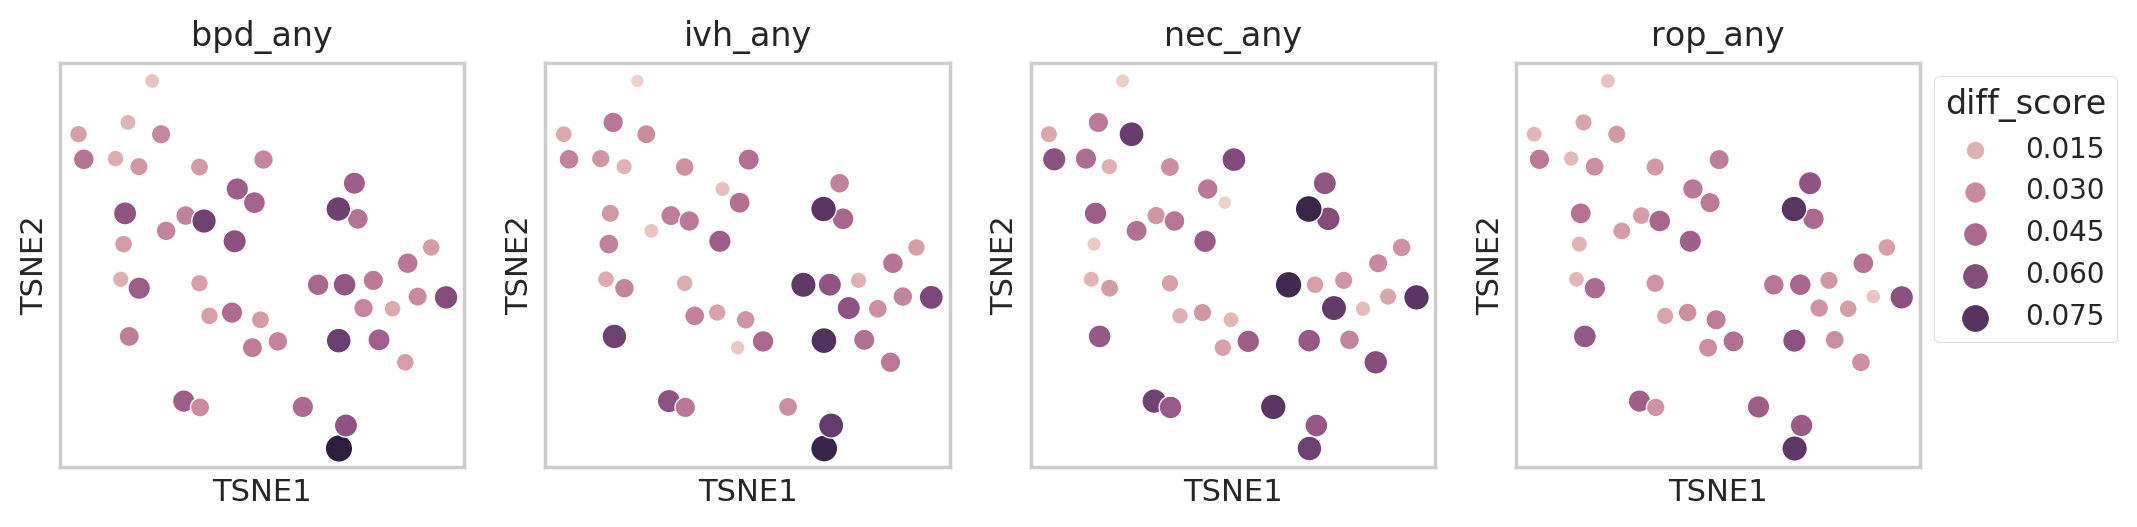

In [30]:
fig, axes = plt.subplots(ncols=4, figsize=(12, 3), dpi=200)
outcomes = sorted(three_q_metab_tsne.outcome.unique())

# Plotting Parameters
n_subplots = len(axes.ravel()) - 1
score_min, score_max = three_q_metab_tsne['diff_score'].min(), three_q_metab_tsne['diff_score'].max()
score_norm = (score_min, score_max)
point_size_range = (0.01, 125)
size_order = [0.015, 0.030, 0.045, 0.060, 0.075]
full_legend_params = None

for i, (o, ax) in enumerate(zip(outcomes, axes.ravel())):
    subplot_data = three_q_metab_tsne.query(f'outcome == "{o}"')
    sns.scatterplot(
        x='TSNE1', y='TSNE2', hue='diff_score', size='diff_score', data=subplot_data,
        hue_norm=score_norm, size_order=size_order, size_norm=score_norm, ax=ax, legend=True)
    ax.grid(False)
    # Set aspect ratio and clean ticks
    xleft, xright = ax.get_xlim()
    ybottom, ytop = ax.get_ylim()
    ax.set_aspect(abs((xright-xleft)/(ybottom-ytop)) * 1.0)
    ax.tick_params(axis='both', bottom=False, left=False, labelbottom=False, labelleft=False)
    ax.set_title(o)
    
    # Store legend information
    ax.get_legend().set_visible(False)
    handles, labels = ax.get_legend_handles_labels()
    if full_legend_params == None:
        full_legend_params = (handles, labels)
    elif len(handles) > len(full_legend_params[0]):
        full_legend_params = (handles, labels)

    if i == n_subplots:
        full_handles, full_labels = full_legend_params
        plt.legend(title='diff_score', handles=full_handles, labels=full_labels)
        sns.move_legend(ax, 'upper left', bbox_to_anchor=(1,1))

plt.subplots_adjust(wspace=0.2)

In [31]:
three_q_metab_tsne.reset_index()

,index,TSNE1,TSNE2,outcome,quantile_split,diff_score
0,ALA,131.820282,-9.829820,bpd_any,ALA_quant_3,0.038973
1,ALA,131.820282,-9.829820,ivh_any,ALA_quant_3,0.039452
2,ALA,131.820282,-9.829820,nec_any,ALA_quant_3,0.030515
3,ALA,131.820282,-9.829820,rop_any,ALA_quant_3,0.040136
4,ARG,81.039856,20.419071,bpd_any,ARG_quant_3,0.040371
...,...,...,...,...,...,...
179,VAL,96.808235,-21.495956,rop_any,VAL_quant_3,0.024752
180,XLE,86.863953,-40.355640,bpd_any,XLE_quant_3,0.031851
181,XLE,86.863953,-40.355640,ivh_any,XLE_quant_3,0.055793
182,XLE,86.863953,-40.355640,nec_any,XLE_quant_3,0.070428


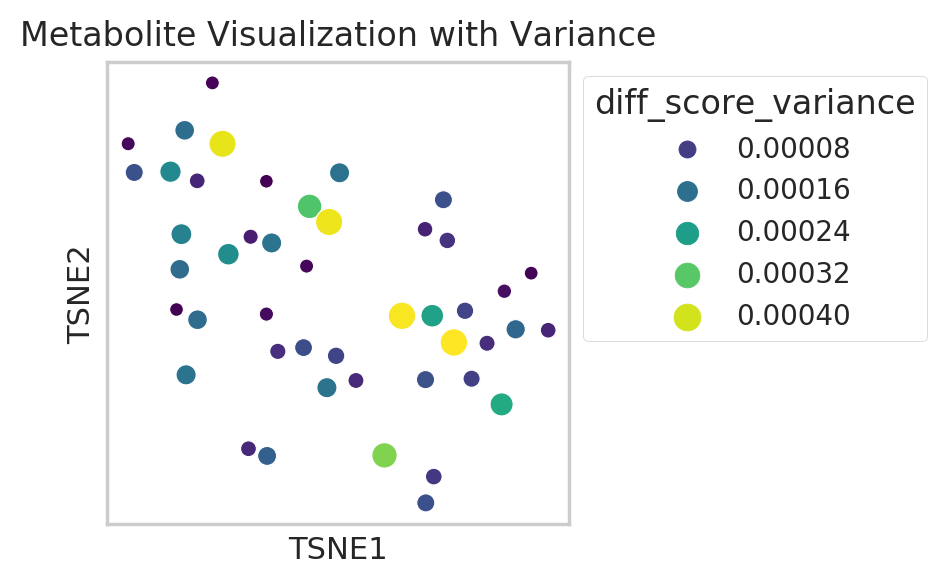

In [36]:
fig, ax = plt.subplots(figsize=(3, 3), dpi=200)
outcomes = sorted(three_q_metab_tsne.outcome.unique())
plot_data = (three_q_metab_tsne.reset_index()
             .rename(columns={'index': 'metab'})
             .groupby(['metab', 'TSNE1', 'TSNE2', 'quantile_split'])['diff_score']
             .var().reset_index().rename(columns={'diff_score': 'diff_score_variance'}))

# Plotting Parameters
score_min, score_max = plot_data['diff_score_variance'].min(), plot_data['diff_score_variance'].max()
score_norm = (score_min, score_max)
point_size_range = (0.01, 125)

# Plot Creation
sns.scatterplot(
        x='TSNE1', y='TSNE2', hue='diff_score_variance', size='diff_score_variance', data=plot_data,
        hue_norm=score_norm, size_norm=score_norm, ax=ax, legend=True, palette='viridis')

# Set aspect ratio and clean ticks
ax.grid(False)
xleft, xright = ax.get_xlim()
ybottom, ytop = ax.get_ylim()
ax.set_aspect(abs((xright-xleft)/(ybottom-ytop)) * 1.0)
ax.tick_params(axis='both', bottom=False, left=False, labelbottom=False, labelleft=False)
ax.set_title('Metabolite Visualization with Variance')
sns.move_legend(ax, 'upper left', bbox_to_anchor=(1,1));


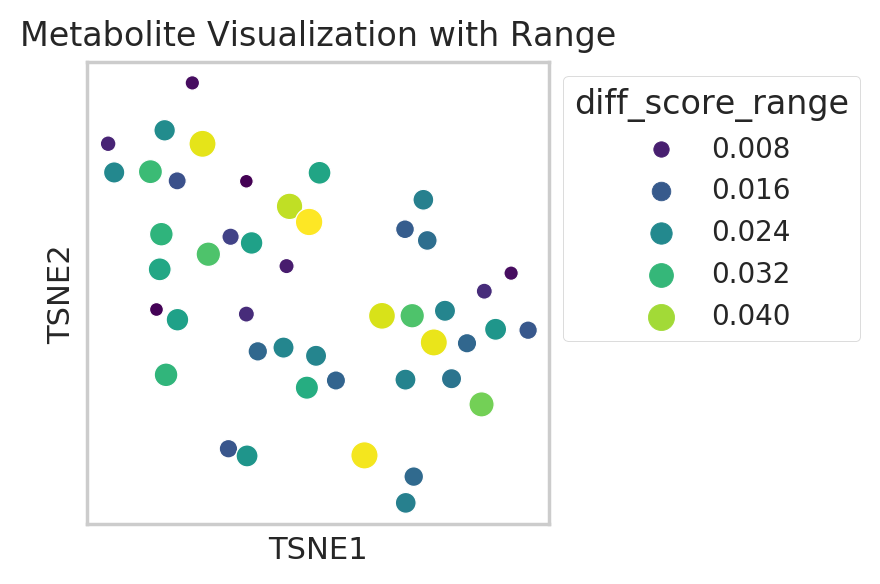

In [37]:
fig, ax = plt.subplots(figsize=(3, 3), dpi=200)
outcomes = sorted(three_q_metab_tsne.outcome.unique())
plot_data = (three_q_metab_tsne.reset_index()
             .rename(columns={'index': 'metab'})
             .groupby(['metab', 'TSNE1', 'TSNE2', 'quantile_split'])
             .apply(lambda x: abs(x['diff_score'].max() - x['diff_score'].min()))
             .reset_index()
             .rename(columns={0: 'diff_score_range'}))

# Plotting Parameters
score_min, score_max = plot_data['diff_score_range'].min(), plot_data['diff_score_range'].max()
score_norm = (score_min, score_max)
point_size_range = (0.01, 125)

# Plot Creation
sns.scatterplot(
        x='TSNE1', y='TSNE2', hue='diff_score_range', size='diff_score_range', data=plot_data,
        hue_norm=score_norm, size_norm=score_norm, ax=ax, legend=True, palette='viridis')

# Set aspect ratio and clean ticks
ax.grid(False)
xleft, xright = ax.get_xlim()
ybottom, ytop = ax.get_ylim()
ax.set_aspect(abs((xright-xleft)/(ybottom-ytop)) * 1.0)
ax.tick_params(axis='both', bottom=False, left=False, labelbottom=False, labelleft=False)
ax.set_title('Metabolite Visualization with Range')
sns.move_legend(ax, 'upper left', bbox_to_anchor=(1,1));


### Metabolite labeling visualization with the same t-SNE layout

In [40]:
three_q_metab_tsne

,TSNE1,TSNE2,outcome,quantile_split,diff_score
ALA,131.820282,-9.829820,bpd_any,ALA_quant_3,0.038973
ALA,131.820282,-9.829820,ivh_any,ALA_quant_3,0.039452
ALA,131.820282,-9.829820,nec_any,ALA_quant_3,0.030515
ALA,131.820282,-9.829820,rop_any,ALA_quant_3,0.040136
ARG,81.039856,20.419071,bpd_any,ARG_quant_3,0.040371
...,...,...,...,...,...
VAL,96.808235,-21.495956,rop_any,VAL_quant_3,0.024752
XLE,86.863953,-40.355640,bpd_any,XLE_quant_3,0.031851
XLE,86.863953,-40.355640,ivh_any,XLE_quant_3,0.055793
XLE,86.863953,-40.355640,nec_any,XLE_quant_3,0.070428


In [87]:
# TODO Experimental: Generating a color map for a set of carbon length values.
from matplotlib import colors as mplcolors
import numpy as np

metabolite_labels = pd.read_csv('../config/metabolite_labels.csv')
acyl_cmap = sns.color_palette('flare', as_cmap=True)
unique_carbon_len = sorted(metabolite_labels['acyl_chain_length'].dropna().unique())
carbon_len_rgb = acyl_cmap(np.linspace(0, 1, len(unique_carbon_len)))
carbon_len_colors = [mplcolors.rgb2hex(c) for c in carbon_len_rgb]
carbon_len_colorkey = {f'{k:.0f}C-chain acylcarnitine': v for k, v in zip(unique_carbon_len, carbon_len_colors)}

# Then merge with different dictionary for metabolites
metab_cat_cmap = sns.color_palette('Set2', as_cmap=True)
# unique_metab_cat = sorted(metabolite_labels['category'].unique())
# Just use a few different categories
unique_metab_cat = ['amino acid', 'free carnitine']
metab_rgb = metab_cat_cmap(np.linspace(0, 1, len(unique_metab_cat)))
metab_colors = [mplcolors.rgb2hex(c) for c in metab_rgb]
metab_colorkey = {k: v for k, v in zip(unique_metab_cat, metab_colors)}

colorkey = {**metab_colorkey, **carbon_len_colorkey}

def create_metabolite_type(df):
    if not np.isnan(df['acyl_chain_length']):
        chain_len_value = df['acyl_chain_length']
        return f'{chain_len_value:.0f}C-chain acylcarnitine'
    else:
        return df['category']

metabolite_labels['metabolite_type'] = metabolite_labels.apply(create_metabolite_type, axis=1)
colorkey

# TODO: Or also create individual metabolite labels?


{'amino acid': '#66c2a5',
 'free carnitine': '#b3b3b3',
 '2C-chain acylcarnitine': '#edb081',
 '3C-chain acylcarnitine': '#eb9872',
 '4C-chain acylcarnitine': '#e77e63',
 '5C-chain acylcarnitine': '#e2655c',
 '6C-chain acylcarnitine': '#d64f5f',
 '8C-chain acylcarnitine': '#c14168',
 '10C-chain acylcarnitine': '#aa3a6e',
 '12C-chain acylcarnitine': '#923371',
 '14C-chain acylcarnitine': '#7a2e70',
 '16C-chain acylcarnitine': '#62296a',
 '18C-chain acylcarnitine': '#4b2362'}

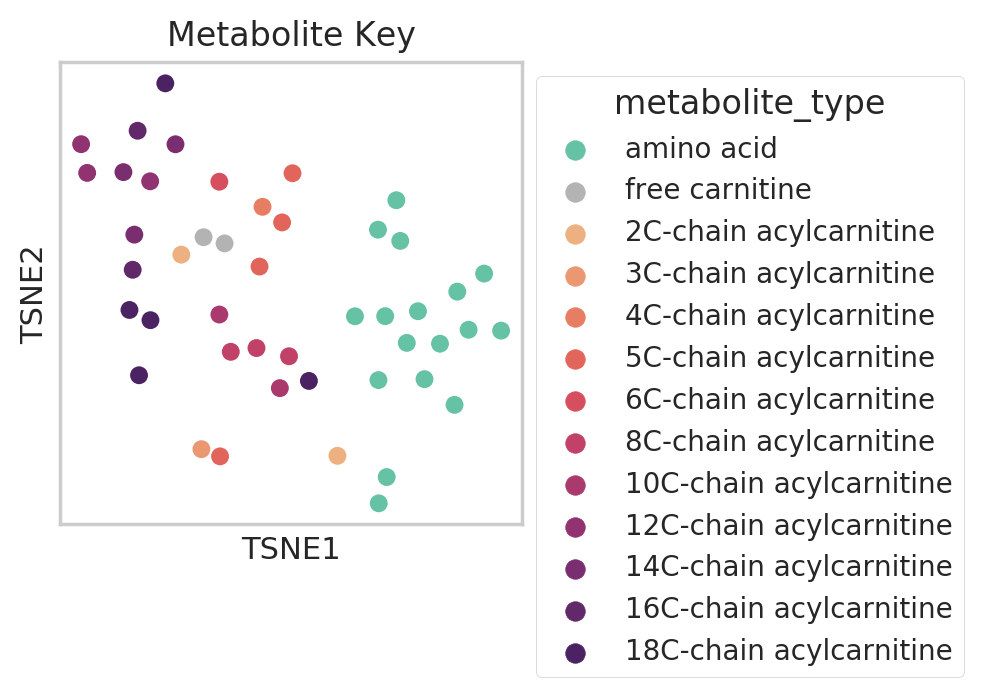

In [88]:
fig, ax = plt.subplots(figsize=(3, 3), dpi=200)
metab_tsne_coords = pd.DataFrame(coords, columns=['TSNE1', 'TSNE2'], index=three_quantile_cols.str.replace('_quant_3', ''))
plot_data = pd.merge(metab_tsne_coords, metabolite_labels.set_index('raw_feature_name'), left_index=True, right_index=True)

# Plot Creation
sns.scatterplot(
        x='TSNE1', y='TSNE2', hue='metabolite_type', data=plot_data,
        ax=ax, hue_order=colorkey.keys(), legend=True, palette=colorkey)

# Set aspect ratio and clean ticks
ax.grid(False)
xleft, xright = ax.get_xlim()
ybottom, ytop = ax.get_ylim()
ax.set_aspect(abs((xright-xleft)/(ybottom-ytop)) * 1.0)
ax.tick_params(axis='both', bottom=False, left=False, labelbottom=False, labelleft=False)
ax.set_title('Metabolite Key')
sns.move_legend(ax, 'upper left', bbox_to_anchor=(1,1));

### Comparing Disease Types in One-vs-Rest Quantification

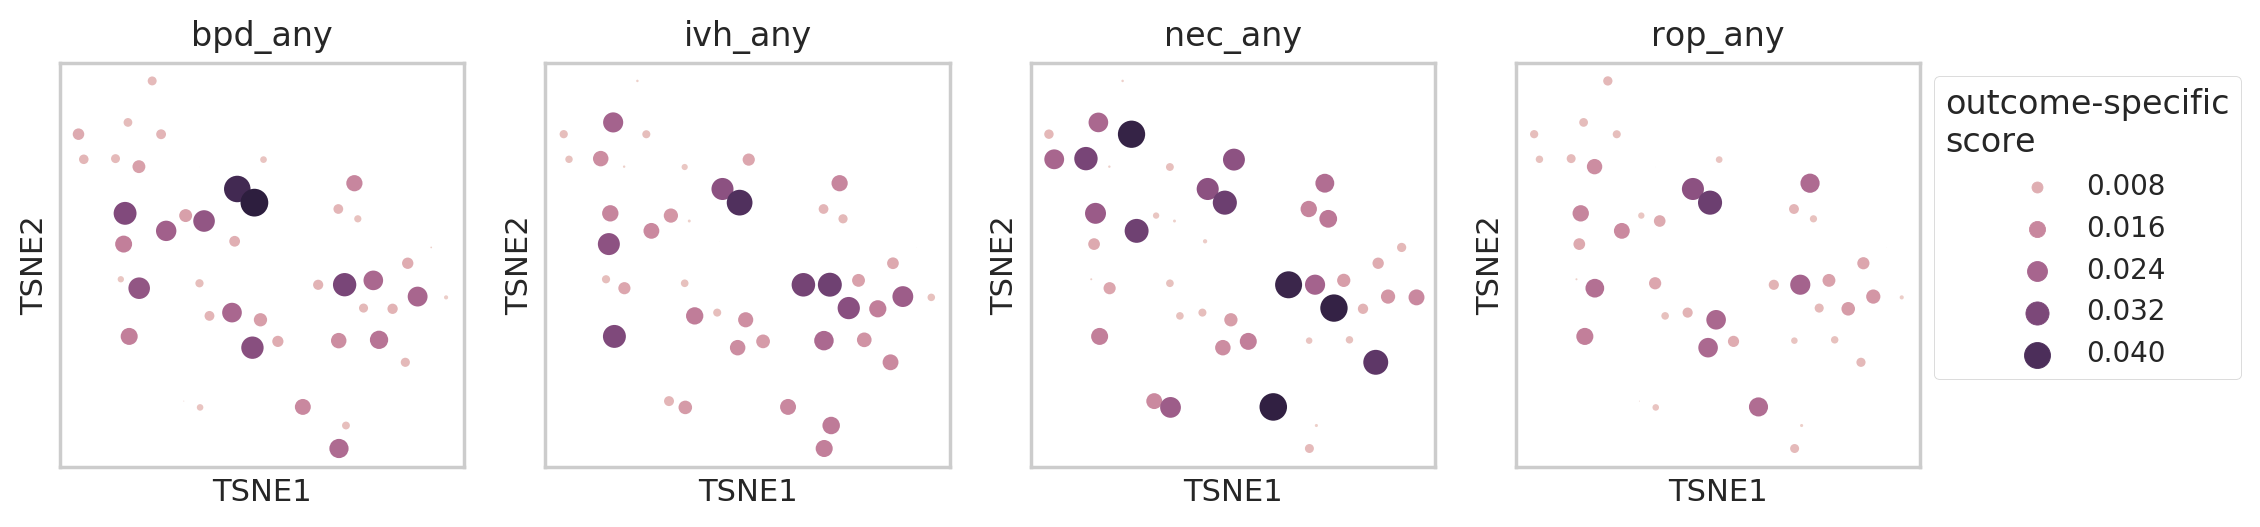

In [34]:
# Here, creating a plot with more of a focus on the differences between the four outcomes
fig, axes = plt.subplots(ncols=4, figsize=(12, 3), dpi=200)
outcomes = sorted(three_q_metab_tsne.outcome.unique())

# Other plot parameters
n_subplots = len(axes.ravel()) - 1
outcome_colors = {'bpd_any': '#166a8e', 'ivh_any': '#9fba81', 'rop_any': '#b1221c', 'nec_any': ''}
score_min, score_max = 0.001, None
size_order = [.008, .00]
point_size_range = (0.01, 100)
full_legend_params = None

for i, (o, ax) in enumerate(zip(outcomes, axes.ravel())):
    # Filtering outcome data from non-outcome data for comparison
    subplot_data = three_q_metab_tsne.query(f'outcome == "{o}"')
    non_outcome_data = three_q_metab_tsne.query(f'outcome != "{o}"')
    smallest_nonoutcome_score = (non_outcome_data
                                 .groupby(['quantile_split'])['diff_score']
                                 .min().reset_index()
                                 .rename(columns={'diff_score': 'min_other_outcome_diff_score'}))
    subplot_data = pd.merge(subplot_data, smallest_nonoutcome_score, on=['quantile_split'])
    subplot_data['outcome_specific_score'] = abs(subplot_data['diff_score'] - subplot_data['min_other_outcome_diff_score'])

    current_max = subplot_data['outcome_specific_score'].max()
    if score_max is None:
        score_max = current_max
    elif current_max > score_max:
        score_max = current_max
    score_norm = (score_min, score_max)

    # Build scatterplot and scatterplot parameters
    sns.scatterplot(
        x='TSNE1', y='TSNE2', hue='outcome_specific_score', size='outcome_specific_score',
        data=subplot_data, ax=ax, legend=True, linewidth=0, sizes=point_size_range,
        hue_norm=score_norm, size_norm=score_norm)
    xleft, xright = ax.get_xlim()
    ybottom, ytop = ax.get_ylim()
    ax.set_aspect(abs((xright-xleft)/(ybottom-ytop)) * 1.0)
    ax.tick_params(axis='both', bottom=False, left=False, labelbottom=False, labelleft=False)
    ax.set_title(o)
    ax.grid(False)

    # Store legend information
    ax.get_legend().set_visible(False)
    handles, labels = ax.get_legend_handles_labels()
    if full_legend_params == None:
        full_legend_params = (handles, labels)
    elif len(handles) > len(full_legend_params[0]):
        full_legend_params = (handles, labels)

    if i == n_subplots:
        full_handles, full_labels = full_legend_params
        plt.legend(title='outcome-specific\nscore', handles=full_handles, labels=full_labels)
        sns.move_legend(ax, 'upper left', bbox_to_anchor=(1,1))

plt.subplots_adjust(wspace=0.2)